# 실습 [22-1]<br>
**실습명: ELMo 시각화를 통한 Contextual Representation의 중의성 해소**<br>


In [ ]:
#ELMo Visualization을 위한 파이썬 패키지 설치
!pip3 install allennlp
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install numpy

In [22]:
!python --version
!allennlp --version

Python 3.7.10
2021-06-24 03:31:09.835872: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
allennlp 2.5.0


In [ ]:
!pip install allennlp==0.9.0

In [1]:
import allennlp

In [2]:
#관련 라이브러리 불러오기
from collections import OrderedDict #순차적인 정보 담는 딕셔너리 구조
import numpy as np
from allennlp.commands.elmo import ElmoEmbedder
  #ELMo : Embedding from Language Models (문장을 정방향으로 예측하는 LM 학습 + 역방향으로 예측하는 LM 학습해서 얻은 벡터 더하는 문장 단위 임베딩 기법)

from sklearn.decomposition import PCA #PCA (주성분분석, feature selection의 한 종류)

In [8]:
#ELMo 클래스 선언
class Elmo:
  def __init__(self):
    self.elmo = ElmoEmbedder()

  #ELMo 벡터 반환 함수 (입력 토큰과 layer에 따라서 반환)
  def get_elmo_vector(self, tokens, layer):
      vectors = self.elmo.embed_sentence(tokens)
      X = []
      for vector in vectors[layer]:
          X.append(vector)

      X = np.array(X)

      return X

In [4]:
#차원 축소 함수(PCA)
def dim_reduction(X, n):
    pca = PCA(n_components=n)
    print("size of X: {}".format(X.shape))
    results = pca.fit_transform(X)
    print("size of reduced X: {}".format(results.shape))

    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print("Variance retained ratio of PCA-{}: {}".format(i+1, ratio))

    return results

In [5]:
#2차원으로 표현된 벡터를 png파일로 저장하는 함수 (matplotlib함수 사용)
def plot(word, token_list, reduced_X, file_name, title):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    # plot ELMo vectors
    i = 0
    for j, token in enumerate(token_list):
        color = pick_color(j)
        for _, w in enumerate(token):

            # only plot the word of interest
            if w.lower() in [word, word + 's', word + 'ing', word + 'ed']:
                ax.plot(reduced_X[i, 0], reduced_X[i, 1], color)
            i += 1

    tokens = []
    for token in token_list:
        tokens += token

    # annotate point
    k = 0
    for i, token in enumerate(tokens):
        if token.lower() in [word, word + 's', word + 'ing', word + 'ed']:
            text = ' '.join(token_list[k])

            # bold the word of interest in the sentence
            text = text.replace(token, r"$\bf{" + token + "}$")

            plt.annotate(text, xy=(reduced_X[i, 0], reduced_X[i, 1]))
            k += 1

    ax.set_title(title)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    fig.savefig(file_name, bbox_inches="tight")

    print("{} saved\n".format(file_name))

In [6]:
#벡터에 표현된 point 색상 지정
def pick_color(i):
    if i == 0:
        color = 'ro'
    elif i == 1:
        color = 'bo'
    elif i == 2:
        color = 'yo'
    elif i == 3:
        color = 'go'
    else:
        color = 'co'
    return color

visualizing word plant using ELMo layer 1
size of X: (47, 1024)
size of reduced X: (47, 2)
Variance retained ratio of PCA-1: 0.09539461880922318
Variance retained ratio of PCA-2: 0.0718805342912674
plant_elmo_layer_1.png saved

visualizing word plant using ELMo layer 2
size of X: (47, 1024)
size of reduced X: (47, 2)
Variance retained ratio of PCA-1: 0.10498980432748795
Variance retained ratio of PCA-2: 0.0777808278799057
plant_elmo_layer_2.png saved



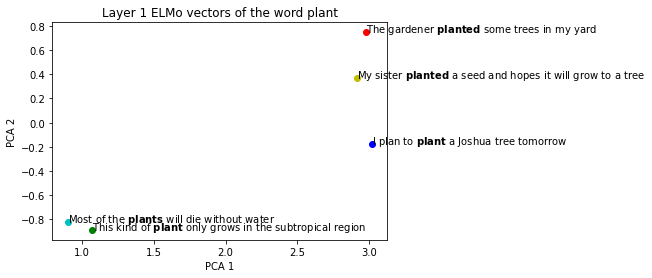

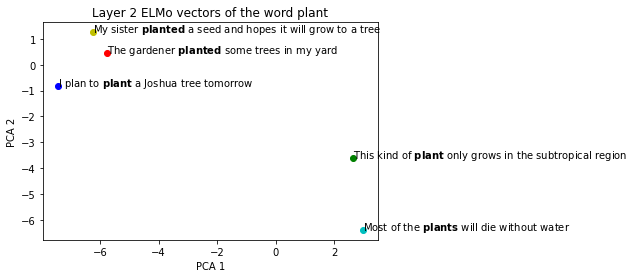

In [9]:
if __name__ == "__main__":
    model = Elmo()
    # Bank에 대한 문장 선언.
#     banks = OrderedDict()
#     # 은행관련 문장
#     banks[0] = "One can deposit money at the bank"
#     # 강둑관련 문장
#     banks[1] = "He had a nice walk along the river bank"
#     # 은행관련 문장
#     banks[2] = "I withdrew cash from the bank"
#     # 강둑관련 문장
#     banks[3] = "The river bank was not clean"
#     # 은행관련 문장
#     banks[4] = "My wife and I have a joint bank account"
    
    
#     # Work에 대한 문장 선언.
#     works = OrderedDict()
#     # 명사로써 이해
#     works[0] = "I like this beautiful work by Andy Warhol"
#     # 동사로써 이해
#     works[1] = "Employee works hard every day"
#     # 동사로써 이해
#     works[2] = "My sister works at Starbucks"
#     # 명사로써 이해
#     works[3] = "This amazing work was done in the early nineteenth century"
#     # 동사로써 이해
#     works[4] = "Hundreds of people work in this building"

    # Plants에 관련 문장 선언. 
    plants = OrderedDict()
    # 심는다의 의미.
    plants[0] = "The gardener planted some trees in my yard"
    # 심는다의 의미.
    plants[1] = "I plan to plant a Joshua tree tomorrow"
    # 심는다의 의미.
    plants[2] = "My sister planted a seed and hopes it will grow to a tree"
    # 식물의 의미.
    plants[3] = "This kind of plant only grows in the subtropical region"
     # 식물의 의미.
    plants[4] = "Most of the plants will die without water"

    words = {
#         "bank": banks,
#         "work": works,
        "plant": plants
    }

    # Elmo의 Layer마다의 출력 결과 비교.
    for layer in [1, 2]:
        for word, sentences in words.items():
            print("visualizing word {} using ELMo layer {}".format(word, layer))
            X = np.concatenate([model.get_elmo_vector(tokens=sentences[idx].split(),
                                                      layer=layer)
                                for idx, _ in enumerate(sentences)], axis=0)

            # 2차원으로 축소
            X_reduce = dim_reduction(X=X, n=2)

            token_list = []
            for _, sentence in sentences.items():
                token_list.append(sentence.split())

            file_name = "{}_elmo_layer_{}.png".format(word, layer)
            title = "Layer {} ELMo vectors of the word {}".format(layer, word)
            plot(word, token_list, X_reduce, file_name, title)

visualizing word work using ELMo layer 1
size of X: (46, 1024)
size of reduced X: (46, 2)
Variance retained ratio of PCA-1: 0.08532381057739258
Variance retained ratio of PCA-2: 0.0818960964679718
work_elmo_layer_1.png saved

visualizing word work using ELMo layer 2
size of X: (46, 1024)
size of reduced X: (46, 2)
Variance retained ratio of PCA-1: 0.09433898329734802
Variance retained ratio of PCA-2: 0.08603529632091522
work_elmo_layer_2.png saved



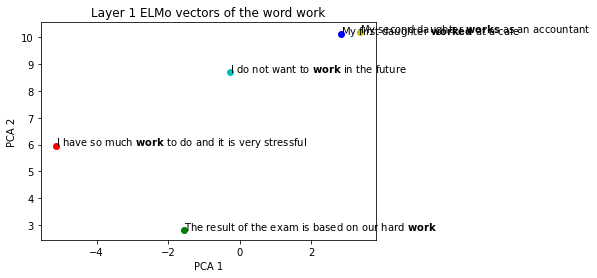

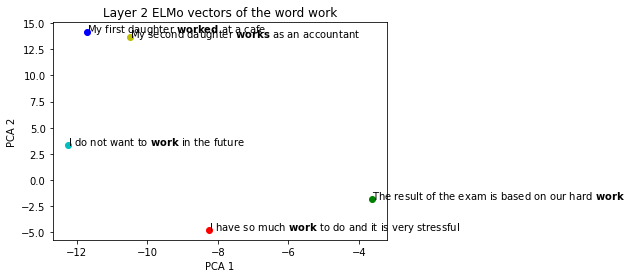

In [14]:
if __name__ == "__main__":
    model = Elmo()
      # Work에 대한 문장 선언
    works = OrderedDict()
      # 명사로써 이해
    works[0] = "I have so much work to do and it is very stressful"
      # 동사로써 이해
    works[1] = "My first daughter worked at a cafe"
      # 동사로써 이해
    works[2] = "My second daughter works as an accountant"
      # 명사로써 이해
    works[3] = "The result of the exam is based on our hard work"
      # 동사로써 이해
    works[4] = "I do not want to work in the future"

    words = {
        "work": works
    }

    # Elmo의 Layer마다의 출력 결과 비교.
    for layer in [1, 2]:
        for word, sentences in words.items():
            print("visualizing word {} using ELMo layer {}".format(word, layer))
            X = np.concatenate([model.get_elmo_vector(tokens=sentences[idx].split(),
                                                      layer=layer)
                                for idx, _ in enumerate(sentences)], axis=0)

            # 2차원으로 축소
            X_reduce = dim_reduction(X=X, n=2)

            token_list = []
            for _, sentence in sentences.items():
                token_list.append(sentence.split())

            file_name = "{}_elmo_layer_{}.png".format(word, layer)
            title = "Layer {} ELMo vectors of the word {}".format(layer, word)
            plot(word, token_list, X_reduce, file_name, title)

# 실습 [22-2]<br>
**실습명: 심층 학습 기반 의미역(Semantic Role Labeling, SRL)**<br>


In [16]:
!pip3 install spacy==2.2.0

     |████████████████████████████████| 10.2MB 8.9MB/s 
     |████████████████████████████████| 3.7MB 28.8MB/s 
     |████████████████████████████████| 2.1MB 31.5MB/s 
     |████████████████████████████████| 133kB 44.4MB/s 
ERROR: en-core-web-sm 2.2.5 has requirement spacy>=2.2.2, but you'll have spacy 2.2.0 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.0 which is incompatible.
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling spacy-2.1.9:
      Successfully uninstalled spacy-2.1.9


In [2]:
import allennlp
import spacy

In [3]:
#사전 학습된 BERT 모델 다운로드
from allennlp.predictors.predictor import Predictor
predictor_srl = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/bert-base-srl-2019.06.17.tar.gz")

In [4]:
#결과 parsing, dict로 변환
def srl_tag_result(predictor_srl, sen):
    dict_result = predictor_srl.predict(sentence=sen)
    result_dict_srl = dict()
    for idx_tag, tags in enumerate(dict_result["verbs"]):

        # print(tags["tags"])
        vals_dict = dict()
        alone_vnode = False
        start_node = 0
        str_temp_val = str()
        for idx_val, val in enumerate(tags["tags"]):
            if "-V" in val:
                start_node = idx_val
                str_temp_val = val
                alone_vnode = True
            else:
                if ("B-" in val) or ("I-" in val):
                    # val_sp = "-".join(val.split("-")[1:])
                    # vals_dict[idx_val + 1] = val_sp
                    vals_dict[idx_val + 1] = val
                    alone_vnode = False

        if alone_vnode is False:
            try:
                result_dict_srl[start_node + 1].update(vals_dict)
            except KeyError:
                result_dict_srl[start_node + 1] = vals_dict
    return result_dict_srl

In [5]:
#메인 함수
import json

sen = "More than a few CEOs say the red-carpet treatment tempts them to return to a heartland city for future meetings."
result_dict_srl = srl_tag_result(predictor_srl, sen=sen)
print(result_dict_srl)

{6: {1: 'B-ARG0', 2: 'I-ARG0', 3: 'I-ARG0', 4: 'I-ARG0', 5: 'I-ARG0', 7: 'B-ARG1', 8: 'I-ARG1', 9: 'I-ARG1', 10: 'I-ARG1', 11: 'I-ARG1', 12: 'I-ARG1', 13: 'I-ARG1', 14: 'I-ARG1', 15: 'I-ARG1', 16: 'I-ARG1', 17: 'I-ARG1', 18: 'I-ARG1', 19: 'I-ARG1', 20: 'I-ARG1', 21: 'I-ARG1', 22: 'I-ARG1'}, 12: {7: 'B-ARG0', 8: 'I-ARG0', 9: 'I-ARG0', 10: 'I-ARG0', 11: 'I-ARG0', 13: 'B-ARG1', 14: 'I-ARG1', 15: 'I-ARG1', 16: 'I-ARG1', 17: 'I-ARG1', 18: 'I-ARG1', 19: 'I-ARG1', 20: 'I-ARG1', 21: 'I-ARG1', 22: 'I-ARG1'}, 15: {13: 'B-ARG1', 16: 'B-ARG4', 17: 'I-ARG4', 18: 'I-ARG4', 19: 'I-ARG4', 20: 'B-ARGM-PRP', 21: 'I-ARGM-PRP', 22: 'I-ARGM-PRP'}}
